In [12]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
new = pd.read_csv(r"C:\Users\suvar\Desktop\Linear Regression\Full_Kaggle_Dataset.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Home_Points,Away_Points,season,Country,Competition
0,ROUND 1,31/08/2002,22:30,RACING SANTANDER,0.0,1.0,VALLADOLID,NaN,NaN,NaN,NaN,0.0,3.0,2002,spain,primera-division
1,ROUND 1,01/09/2002,21:00,RAYO VALLECANO,2.0,2.0,ALAVES,NaN,NaN,NaN,NaN,1.0,1.0,2002,spain,primera-division
2,ROUND 1,01/09/2002,21:00,REAL SOCIEDAD,4.0,2.0,ATHLETIC BILBAO,NaN,NaN,NaN,NaN,3.0,0.0,2002,spain,primera-division
3,ROUND 1,01/09/2002,22:00,MALLORCA,0.0,2.0,VALENCIA,NaN,NaN,NaN,NaN,0.0,3.0,2002,spain,primera-division
4,ROUND 1,01/09/2002,22:30,VILLARREAL,2.0,2.0,OSASUNA,NaN,NaN,NaN,NaN,1.0,1.0,2002,spain,primera-division
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51397,SEMI FINALS,01/03/2022,22:00,AC MILAN,0.0,0.0,INTER,NaN,NaN,NaN,NaN,1.0,1.0,2021,italy,fa-cup
51398,SEMI FINALS,02/03/2022,22:00,FIORENTINA,0.0,1.0,JUVENTUS,NaN,NaN,NaN,NaN,0.0,3.0,2021,italy,fa-cup
51399,SEMI FINALS,19/04/2022,22:00,INTER,3.0,0.0,AC MILAN,NaN,NaN,NaN,NaN,3.0,0.0,2021,italy,fa-cup
51400,SEMI FINALS,20/04/2022,22:00,JUVENTUS,2.0,0.0,FIORENTINA,NaN,NaN,NaN,NaN,3.0,0.0,2021,italy,fa-cup


In [14]:
# Putting feature variable to X
X = new.drop('Time', axis= 1)

# Putting response variable to y
y = new[['Time']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [15]:
df= pd.concat([y_train, X_train], axis=1)
df.head()

,Time,Round,Date,Home_Team,Home_Score,Away_Score,Away_Team,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Home_Points,Away_Points,season,Country,Competition
41806,22:00,quarter-finals,08/04/2021,AJAX,1.0,2.0,ROMA,NaN,NaN,NaN,NaN,0.0,3.0,2020,europe-uefa,uefa-europa-league
7892,17:00,ROUND 22,01/01/2003,ASTON VILLA,2.0,0.0,BOLTON,NaN,NaN,NaN,NaN,3.0,0.0,2002,england,premier-league
34508,21:45,ROUND 5,21/09/2016,ATALANTA,0.0,1.0,PALERMO,NaN,NaN,NaN,NaN,0.0,3.0,2016,italy,serie-a
39107,22:00,quarter-finals,13/08/2020,RB LEIPZIG,2.0,1.0,ATLETICO MADRID,NaN,NaN,NaN,NaN,3.0,0.0,2019,europe-uefa,uefa-champions-league
14578,22:00,ROUND 7,30/10/2020,WOLVERHAMPTON,2.0,0.0,CRYSTAL PALACE,NaN,NaN,NaN,NaN,3.0,0.0,2020,england,premier-league


In [10]:
df.corr()

,match_id,season,innings_id,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain
match_id,1.000000,NaN,-0.019799,0.042888,0.069678,0.108341,0.054639,0.039655,0.041176,0.059525,0.162716,-0.076438,0.005476,-0.002126
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
innings_id,-0.019799,NaN,1.000000,-0.130116,0.097205,-0.178447,0.043737,-0.073708,0.009304,-0.089235,-0.066715,-0.116136,0.012013,0.114695
overs,0.042888,NaN,-0.130116,1.000000,0.113420,0.605234,0.451587,-0.283817,0.742536,0.268891,0.186846,0.277436,0.034809,-0.097670
maidens,0.069678,NaN,0.097205,0.113420,1.000000,-0.096225,0.156213,-0.183778,0.292720,0.025246,-0.080324,-0.017759,-0.001637,-0.036239
conceded,0.108341,NaN,-0.178447,0.605234,-0.096225,1.000000,0.038537,0.504202,0.117414,0.638848,0.646425,0.259427,0.225528,-0.045503
wickets,0.054639,NaN,0.043737,0.451587,0.156213,0.038537,1.000000,-0.369248,0.588408,0.020053,-0.047584,0.080949,0.071082,-0.086145
economyRate,0.039655,NaN,-0.073708,-0.283817,-0.183778,0.504202,-0.369248,1.000000,-0.537290,0.465433,0.523959,0.030119,0.220489,0.024665
dots,0.041176,NaN,0.009304,0.742536,0.292720,0.117414,0.588408,-0.537290,1.000000,0.085913,-0.026329,0.298468,0.046214,-0.153609
foursConceded,0.059525,NaN,-0.089235,0.268891,0.025246,0.638848,0.020053,0.465433,0.085913,1.000000,0.115848,0.132847,0.235516,-0.089286


<AxesSubplot:>

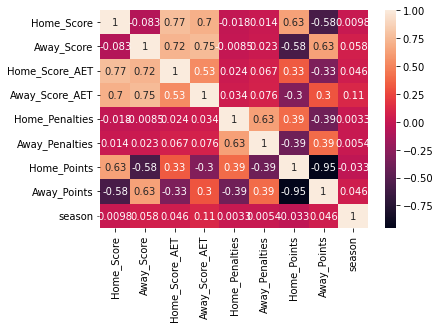

In [16]:
sns.heatmap(df.corr(),annot=True)